# Whitepaper HashJing

In [334]:
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd
import sys
sys.path.append("..")

import importlib
import hash_utils.base_hash as base_hash
importlib.reload(base_hash)
print()

## Introduction

**HashJing** is a philosophical and aesthetic experiment at the intersection of generative art, cryptography, and Eastern symbolism. The name combines “hash” (a unique digital fingerprint) and the character **經** *jīng* — “canon” or “classical text.” In other words, it is a “Canon of the Hash”: a deterministic form where entropy becomes observable order.

Each 256-bit hash is transformed into a **mandala of 64 radial sectors and 4 concentric layers**: one hex symbol → one sector, one bit → one layer. This transformation of number into image raises questions: can randomness become meaningful? What if we view digital structures as modern ideograms? Where is the boundary between entropy and canon? References to the 64 hexagrams of the *I Ching* and the Daoist diagram of Wuji → Taiji connect this inquiry to an ancient tradition of contemplating change.

### What a Random Hash Looks Like

Below is an example of a random hash consisting of 64 values written in the hexadecimal (hex) numeral system. Each of the 64 values is represented by 4 bits, totaling 256 bits. The prefix `0x` indicates that what follows is a number written in hexadecimal.


In [239]:
my_hash = base_hash.generate_random_hash()
print(my_hash)

0xf77b8fc90ea309c0418067c15209b641d012021dfdf18fb76d3aed838a1cfd21


## 1. Hash and Randomness

In the generative system **HashJing**, everything begins with a **256-bit hash** — a string of 64 hexadecimal characters prefixed with `0x`. Each such hash is:

* **deterministic** — the same input will always produce the same output;
* **apparently random** — without knowing the input, predicting the result is virtually impossible.

This duality makes the hash an ideal "seed" for visual form: it firmly anchors the connection between number and image, while preserving an aura of mystery.

### What is a Hash?

A **hash function** is a one-way mathematical operation that transforms an input of arbitrary length into a fixed-size string. For example, here's how to generate an SHA-256 hash in Python:

```python
import hashlib
def hash_to_hex256(word: str) -> str:
    hash_bytes = hashlib.sha256(word.encode()).digest()
    return '0x' + hash_bytes.hex()
    
hash_to_hex256("HashJing")
# ➜ '0x2b054d225d025fc24c58030bda276b16089ae21cc8aff93d2751472a98eab06c'
```

#### Demonstration of the hash generation function from arbitrary text

In [8]:
base_hash.hash_to_hex256("HashJing")

'0x2b054d225d025fc24c58030bda276b16089ae21cc8aff93d2751472a98eab06c'

The resulting 64 hex characters can be easily interpreted as 256 bits → **64 radial sectors × 4 concentric layers** in the HashJing visualization algorithm (1 hex character → 1 sector, 1 bit → 1 layer).
This transformation from number to image will be described in detail in the next sections.

### Where to Get Hashes in the Blockchain

| Source                              | Usage in NFT minting                                        | Size                |
| ----------------------------------- | ----------------------------------------------------------- | ------------------- |
| `tokenData.hash` (Art Blocks)       | Automatically assigned to token during mint                 | 256 bits (32 bytes) |
| `blockhash(n)`                      | Block-level randomness, often used as a `seed`              | 256 bits (32 bytes) |
| `keccak256(tokenId ∥ secret)`       | User-defined method for unpredictable but reproducible hash | 256 bits (32 bytes) |
| `sha256`, `blake2b`, Poseidon, etc. | Off-chain generation for extra cryptographic quality        | varies              |

### Pseudorandom Hash for Testing

For sketches and debugging, a simple helper function is useful:

```python
import random, string

def generate_random_hash() -> str:
    alphabet = string.hexdigits.lower()[:16]  # '0123456789abcdef'
    return '0x' + ''.join(random.choices(alphabet, k=64))
    
generate_random_hash()
# ➜ 0x7c3a...e1b4
```

⚠️ This is **not cryptographically secure** randomness (results can be reproduced with a fixed `random.seed()`), but it's sufficient for artistic prototyping.

#### Demonstration of pseudorandom hash generation function


In [6]:
base_hash.generate_random_hash()

'0x1de8b55a3c084bff6e2ca62f0f5a9a3d25f1b5b028f4f0e8504cf1cefafc757e'

### Deterministic Randomness as a Mirror of Form

A hash acts as both a **precise address** of an image and a **mystery**: for most people, it’s nearly impossible to predict what kind of pattern a given string will generate until it’s rendered.
The visualization of 256 bits reveals the hidden **symmetry, rhythm, and repetition** buried in the raw text — the very “**yin-yang of digital entropy**” at the heart of HashJing.

## 2. Binary Representation of Numbers and the Schemes of the “Book of Changes”

The *I Ching* (易經, *Yìjīng*) — the “Book of Changes” — is arguably the first known example of **binary notation** in human history.
Its “alphabet” is the **hexagram**: a vertical stack of 6 lines, where

| Line   | Symbol | Bit | Semantics                     |
| ------ | ------ | --- | ----------------------------- |
| broken | - -    | 0   | 陰 *yīn* — darkness, passivity |
| solid  | ---    | 1   | 陽 *yáng* — light, activity    |

Each hexagram is thus encoded as a number **from 0 to 63** (2⁶ – 1). Lines are read **from top to bottom**; the **least significant bit** is the top line, the **most significant** is the bottom.

| Hexagram Level | 0 (000000) | 1 (000001) | 2 (000010) |  …  | 62 (111110) | 63 (111111) |
| :------------: | :--------: | :--------: | :--------: | :-: | :---------: | :---------: |
|        ⑥       |     - -    |     ---    |     - -    |     |     - -     |     ---     |
|        ⑤       |     - -    |     - -    |     ---    |     |     ---     |     ---     |
|        ④       |     - -    |     - -    |     - -    |     |     ---     |     ---     |
|        ③       |     - -    |     - -    |     - -    |     |     ---     |     ---     |
|        ②       |     - -    |     - -    |     - -    |     |     ---     |     ---     |
|        ①       |     - -    |     - -    |     - -    |     |     ---     |     ---     |

**Table of vertical bit layouts for hexagrams in binary order.**
Rows ⑥ → ① represent lines from top (least significant bit) to bottom (most significant); columns show the first three and last two hexagrams of the 0–63 range. `---` denotes a yang line (1), `- -` a yin line (0); `…` indicates omitted intermediate columns.

<figure markdown>
<img src="pic/yi_circle.jpg" alt="Circular arrangement of 64 hexagrams (Fu Xi order)" width="450"/>
</figure>

**Circular diagram of the 64 hexagrams in numeric (arithmetic) order.**
The starting point is Kūn `000000` at the top. Moving clockwise, we add `+1` to the six-bit number with each step: `000001`, `000010`, … until the cycle closes at Qián `111111`. Black = yīn `0`, white = yáng `1`.
This “ascending” arrangement matches the way HashJing fills its 64 sectors.

### From Hexagrams to HashJing

HashJing takes the same idea of binary motifs and applies it to a modern **256-bit hash** (SHA-256 / Keccak-256):

```
0x87a797a48cba94ee585ee2c0d7d6f4cce4dd12f77192a4d0bc562938d6fb62b1
```

* 64 hex characters → **64 “sectors”** of the mandala
* Each hex = 4 bits → **4 concentric layers** (from center to periphery)

Thus emerges a **natural bridge** between cryptographic randomness and the binary cosmology of the *I Ching*: instead of six lines we now read four, but the logic of “least significant bit → innermost layer” directly inherits the principle of “from bottom to top”.

---

## 3. The Principle of Diagram Construction

HashJing interprets a 256-bit hash as **64 hexadecimal characters**.
Each hex character → **4 bits** → one radial sector with 4 concentric cells.

### ▸ Binary Decomposition

*Each hex character is explicitly mapped to its 4 bits (from least to most significant).*


In [243]:
my_hash = base_hash.generate_random_hash()
print(f'my_hash = {my_hash}')
print()
base_hash.explain_hex_to_bin(my_hash)

my_hash = 0xe943e1fccbb4df989831e973e60a176b7713b6a5410210d4ffb1216b1a52ccb0

00: E -> 1110
01: 9 -> 1001
02: 4 -> 0100
03: 3 -> 0011
04: E -> 1110
05: 1 -> 0001
06: F -> 1111
07: C -> 1100
08: C -> 1100
09: B -> 1011
10: B -> 1011
11: 4 -> 0100
12: D -> 1101
13: F -> 1111
14: 9 -> 1001
15: 8 -> 1000
16: 9 -> 1001
17: 8 -> 1000
18: 3 -> 0011
19: 1 -> 0001
20: E -> 1110
21: 9 -> 1001
22: 7 -> 0111
23: 3 -> 0011
24: E -> 1110
25: 6 -> 0110
26: 0 -> 0000
27: A -> 1010
28: 1 -> 0001
29: 7 -> 0111
30: 6 -> 0110
31: B -> 1011
32: 7 -> 0111
33: 7 -> 0111
34: 1 -> 0001
35: 3 -> 0011
36: B -> 1011
37: 6 -> 0110
38: A -> 1010
39: 5 -> 0101
40: 4 -> 0100
41: 1 -> 0001
42: 0 -> 0000
43: 2 -> 0010
44: 1 -> 0001
45: 0 -> 0000
46: D -> 1101
47: 4 -> 0100
48: F -> 1111
49: F -> 1111
50: B -> 1011
51: 1 -> 0001
52: 2 -> 0010
53: 1 -> 0001
54: 6 -> 0110
55: B -> 1011
56: 1 -> 0001
57: A -> 1010
58: 5 -> 0101
59: 2 -> 0010
60: C -> 1100
61: C -> 1100
62: B -> 1011
63: 0 -> 0000


### ▸ Rectangular Unfolding

Below is the function `draw_binary_grid_from_hex(my_hash)`, which renders the hash string as a linear ribbon. It is read **left to right**.
The source code for this and other project functions can be found [here](#).

* 4 rows × 64 columns.
* **Top = least significant bit**, bottom = most significant bit.
* ◼️ = 0 (yin), ◻️ = 1 (yang).
* Red vertical lines divide the ribbon into 4 blocks of 16 symbols — the same “quarters” that will later form the mandala structure.


my_hash = 0x7688804e7c918a91f4e23b17595fa90aba3b186159005c4e15382e94ace0e60c



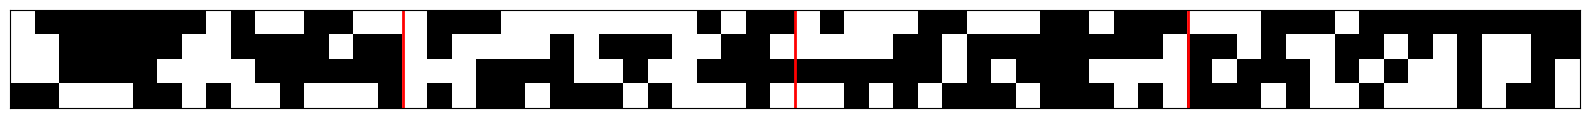

In [332]:
my_hash = base_hash.generate_random_hash()
print(f'my_hash = {my_hash}')
print()

# Hash split into «quarters»
# 87a797a48cba94ee | 585ee2c0d7d6f4cc | e4dd12f77192a4d0 | bc562938d6fb62b1

base_hash.draw_binary_grid_from_hex(my_hash)

### ▸ Circular Mandala

Below is the function `base_hash.draw_mandala(my_hash)`, which generates a circular mandala based on the principles described above. The linear ribbon displays the hash “as-is,” while the mandala represents the same sequence of bits folded into a circle of 64 sectors and 4 layers. This transformation reveals the symmetry and rhythm hidden in the 256-bit number while maintaining strict determinism: one hash → one form.

* The 64 sectors are arranged **clockwise**, starting at the “12 o’clock” position. A red radial line is added to highlight the starting point.
* In each sector, the concentric cells from center to outer edge represent bits `b0 → b1 → b2 → b3`.
* White = 1 (yang), black = 0 (yin).
* The original hash is displayed in the center, split into 4 lines × 16 characters — making it easy to match text to visual.


my_hash = 0x7688804e7c918a91f4e23b17595fa90aba3b186159005c4e15382e94ace0e60c



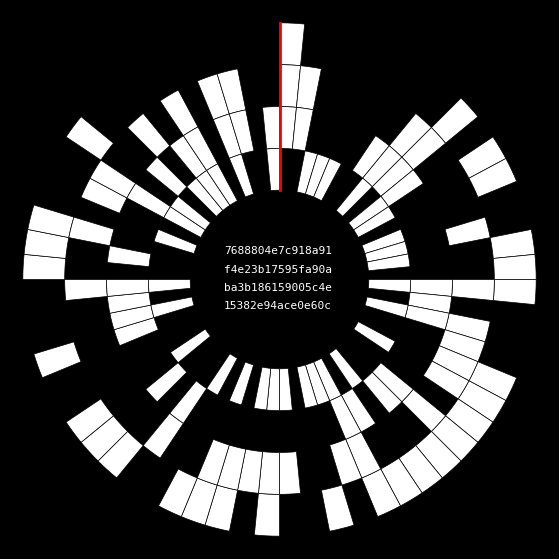

In [333]:
print(f'my_hash = {my_hash}')
print()
base_hash.draw_mandala(my_hash, show_radial_line=True)

### ▸ Addresses as Hashes: Visualizing 160-Bit Forms

In addition to 256-bit hashes, **HashJing** can also transform **Ethereum addresses** — wallet or smart contract numbers — into mandalas. Visually, these are just 40 hex characters, but in essence, they represent a truncated fragment of a Keccak-256 hash, totaling **160 bits**.

Since `base_hash.draw_mandala()` accepts any length divisible by 4, for an address we simply specify `sectors = 40`:

my_hash = 0x712b095709bfca9de772faa42c4a261e55f71ad3



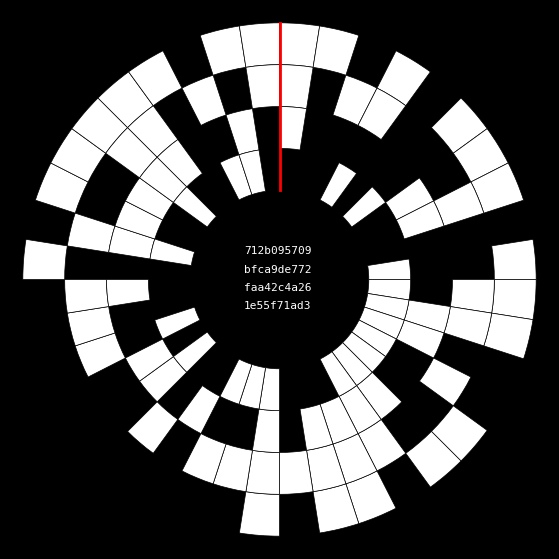

In [260]:
my_hash = base_hash.generate_random_hash(bits=160)
print(f'my_hash = {my_hash}')
print()
base_hash.draw_mandala(
    my_hash, 
    sectors=40, show_radial_line=True
)

The algorithm remains the same: each hex character produces four concentric cells, so the address appears as **40 radial sectors × 4 rings**. This allows any on-chain object — whether a wallet, contract, or NFT — to be "signed" with a mandala, while preserving HashJing’s core principle: **one hash → one unique form**.

## 4. Features of Order

This section explores internal properties of circular mandalas that exhibit signs of structural order. These properties are not artificially imposed, but rather emerge as a secondary organization within the discrete entropy of a hash.

### 4.1 Balanced Mandala

If a hash contains exactly 128 ones and 128 zeros (out of 256 bits), it is referred to as *balanced*.  
In a sample of **10,000 randomly generated 256-bit hashes** using `secrets.token_hex(32)`, such mandalas appeared in approximately **5%** of cases — making them relatively rare.

Below are examples of balanced mandalas derived from both 256-bit and 160-bit hashes.

#### Balanced 256-bit Hash

Example of a balanced mandala generated from the 256-bit hash "0x3f8e578ec92fd8aa95fe7d68277040f025f4410fd22d04989cfa11379d56a0cf"



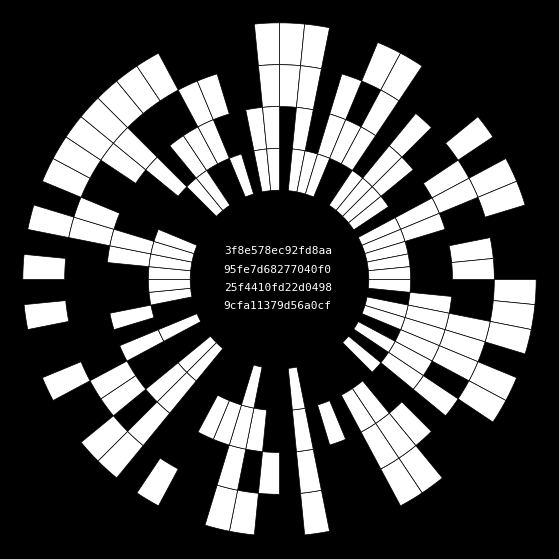


Checking the ratio of zeros to ones for the sample 160-bit hex string "0x3f8e578ec92fd8aa95fe7d68277040f025f4410fd22d04989cfa11379d56a0cf" = 1.00
(For a balanced hash, this ratio should equal 1.00)

Balance check → is_balanced: True


In [261]:
balansed_hash_256 = base_hash.generate_balanced_hash()
print(f'Example of a balanced mandala generated from the 256-bit hash "{balansed_hash_256}"')
print()
base_hash.draw_mandala(balansed_hash_256)
print()
print(
    "Checking the ratio of zeros to ones for the sample 160-bit hex string "
    f'"{balansed_hash_256}" = {base_hash.bit_ratio(balansed_hash_256)}'
)
print("(For a balanced hash, this ratio should equal 1.00)\n")
print(f"Balance check → is_balanced: {base_hash.is_balanced(balansed_hash_256)}")

#### Balanced 160-bit Hash

Example of a balanced mandala generated from the 160-bit hash "0x85bf2f972151746a565b7c194e818c943d21fe9a"



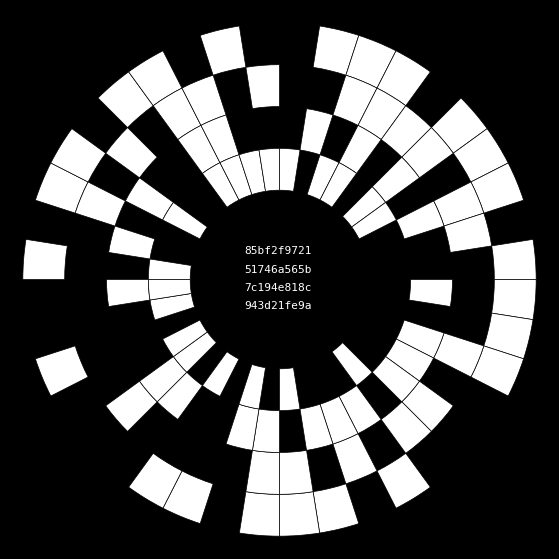


Checking the ratio of zeros to ones for the sample 160-bit hex string "0x85bf2f972151746a565b7c194e818c943d21fe9a" = 1.00
(For a balanced hash, this ratio should equal 1.00)

Balance check → is_balanced: True


In [262]:
balansed_hash_160 = base_hash.generate_balanced_hash(bits=160)
print(f'Example of a balanced mandala generated from the 160-bit hash "{balansed_hash_160}"')
print()
base_hash.draw_mandala(balansed_hash_160, sectors=40)
print()
print(
    "Checking the ratio of zeros to ones for the sample 160-bit hex string "
    f'"{balansed_hash_160}" = {base_hash.bit_ratio(balansed_hash_160)}'
)
print("(For a balanced hash, this ratio should equal 1.00)\n")

print(f"Balance check → is_balanced: {base_hash.is_balanced(balansed_hash_160)}")

#### Theoretical probability:

For a perfectly random binary string of `n` bits, the probability of having exactly `n/2` zeros and `n/2` ones is given by:

$$
P = \frac{\binom{n}{n/2}}{2^n}
$$

- For **256-bit** hashes:

$$
P = \frac{\binom{256}{128}}{2^{256}} \approx 4.98\%
$$

- For **160-bit** hashes (e.g., Ethereum addresses):

$$
P = \frac{\binom{160}{80}}{2^{160}} \approx 6.26\%
$$

These values define the statistical rarity of *balanced mandalas*, and demonstrate that even in pure entropy, a form of equilibrium emerges — albeit infrequently.

### 4.2 Passages and Sealed Structures in the Mandala

Most mandalas exhibit one or more **passages** — continuous paths from the central region to the outer ring, formed entirely by zeros (black segments). These passages can be interpreted as escape routes through the labyrinth, which a hypothetical observer could follow outward.

Each passage is **isolated by impassable walls** of ones (white segments), which break connectivity between paths and prevent crossovers.

A **sealed mandala** is a special case where none of the central cells (inner ring) provide any route to the outside. No passage connects the center to the edge — even indirectly. It is essentially an *airtight labyrinth*, entirely enclosed by "white walls."

Such structures are exceedingly rare: out of 10,000 randomly generated 256-bit hashes using `secrets.token_hex(32)`, only about **0.07%** (7 out of 10,000) resulted in sealed mandalas.

#### 4.2.1 Single-Passage Hash
As an example, let us consider mandalas with exactly one passage:

Single-passage 256-bit hash: 0xbc9febddf89203e76c396aa5ba9124fffb263e876ab12573e9b71f7db98897a2



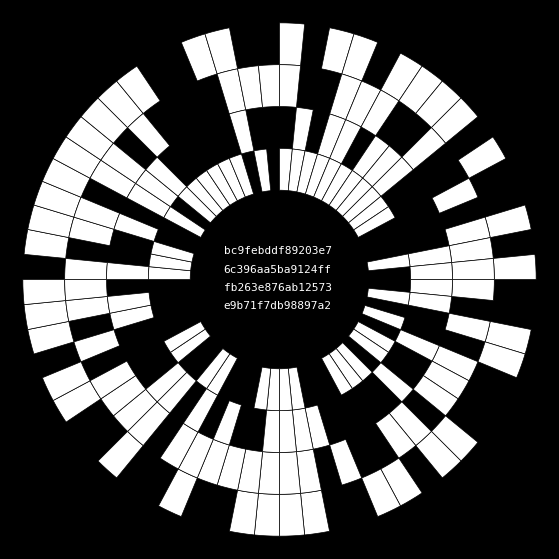

In [285]:
single_passage_hash = base_hash.generate_hash_with_passages(target_passages=1)
print(f'Single-passage 256-bit hash: {single_passage_hash}')
print()
base_hash.draw_mandala(single_passage_hash)

Single-passage 160-bit hash: 0xe4f8aeabd9e974ab73d0002936a36cfdbeae966b



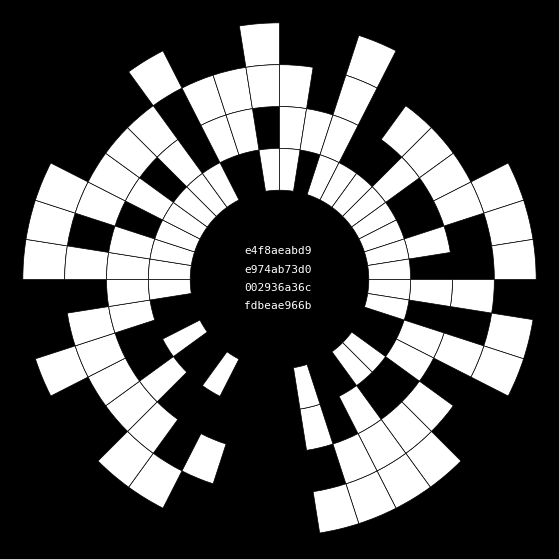

In [286]:
single_passage_hash = base_hash.generate_hash_with_passages(target_passages=1, bits=160)
print(f'Single-passage 160-bit hash: {single_passage_hash}')
print()
base_hash.draw_mandala(single_passage_hash, sectors=40)

#### 4.2.2 Determining the Number of Passages in a Mandala Generated from a Random Hash

my_hash = 0x483dc60ee2fafcca2af62fbdd1a8908c97e36e3d169fd98dfebeee93a8d8b4a4
Number of passages in the mandala generated from the 256-bit hash = 4



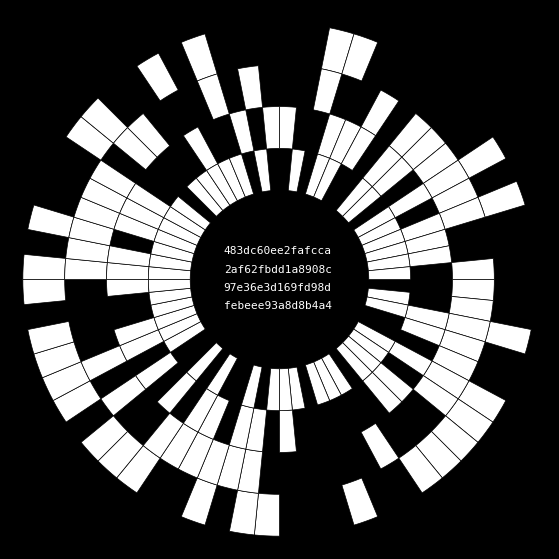

In [303]:
my_hash = base_hash.generate_random_hash()
print(f'my_hash = {my_hash}')
print(f'Number of passages in the mandala generated from the 256-bit hash = {base_hash.count_unique_passages(my_hash)}')
print()
base_hash.draw_mandala(my_hash)

my_hash = 0x79334f982b325206ccb332e2e09adaeaeb58c763
Number of passages in the mandala generated from the 160-bit hash = 2



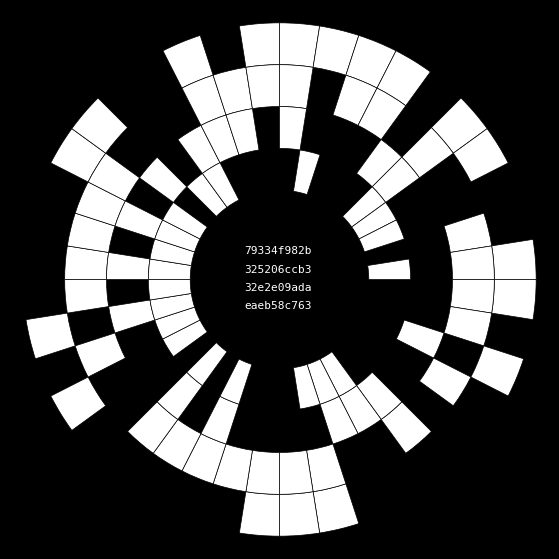

In [304]:
my_hash = base_hash.generate_random_hash(bits=160)
print(f'my_hash = {my_hash}')
print(f'Number of passages in the mandala generated from the 160-bit hash = {base_hash.count_unique_passages(my_hash)}')
print()
base_hash.draw_mandala(my_hash, sectors=40)

#### 4.2.3 Sealed Mandala
Below are examples of *sealed* mandalas generated from 256-bit and 160-bit hashes, respectively:

Sealed 256-bit hash: 0x9eecc4a899a61651f6dfe66a4d9da8b761f1f4f1754757fd6b43d997134f2577
Number of passages in the mandala generated from the 256-bit hash: 0



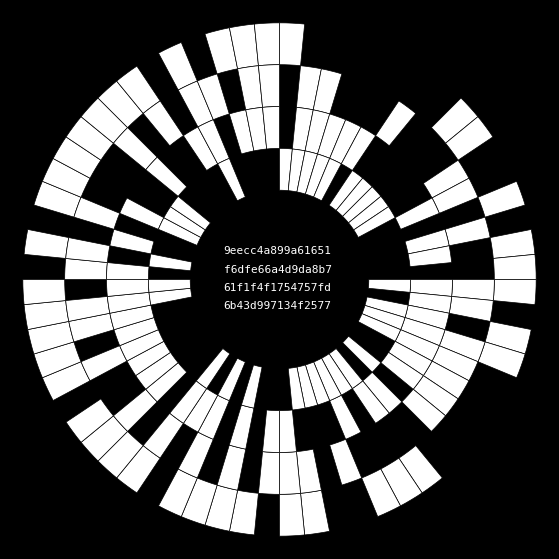

In [305]:
sealed_hash = base_hash.generate_hash_with_passages(target_passages=0)
print(f'Sealed 256-bit hash: {sealed_hash}')
print(f'Number of passages in the mandala generated from the 256-bit hash: {base_hash.count_unique_passages(sealed_hash)}')
print()
base_hash.draw_mandala(sealed_hash)

Sealed 160-bit hash: 0xe9bef231f67ac5dc364d7157fb1a2f5393fca24f
Number of passages in the mandala generated from the 160-bit hash: 0



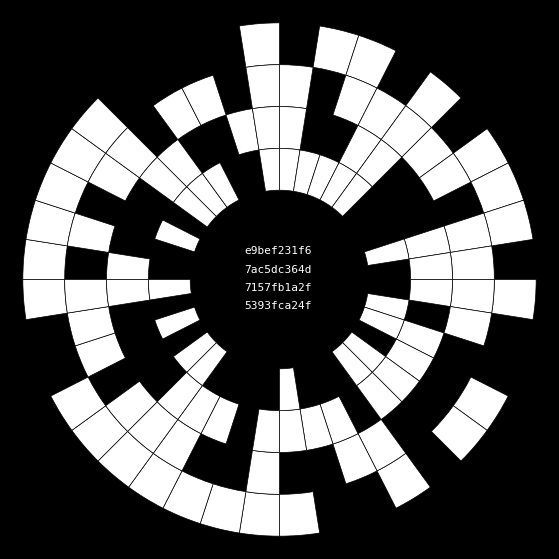

In [306]:
sealed_hash = base_hash.generate_hash_with_passages(target_passages=0, bits=160)
print(f'Sealed 160-bit hash: {sealed_hash}')
print(f'Number of passages in the mandala generated from the 160-bit hash: {base_hash.count_unique_passages(sealed_hash)}')
print()
base_hash.draw_mandala(sealed_hash, sectors=40)

#### 4.2.4 Distribution of Passage Counts
This section explores the statistical distribution of the number of radial passages in mandalas derived from random hashes. Each passage represents a possible escape route from the center to the outer ring, defined by connected black (zero) segments. By generating thousands of hashes and counting the number of unique passages in each, we gain insight into how frequently sealed, single-path, or highly porous mandalas occur.

Below are two histograms visualizing these distributions for 256-bit and 160-bit hashes, respectively.

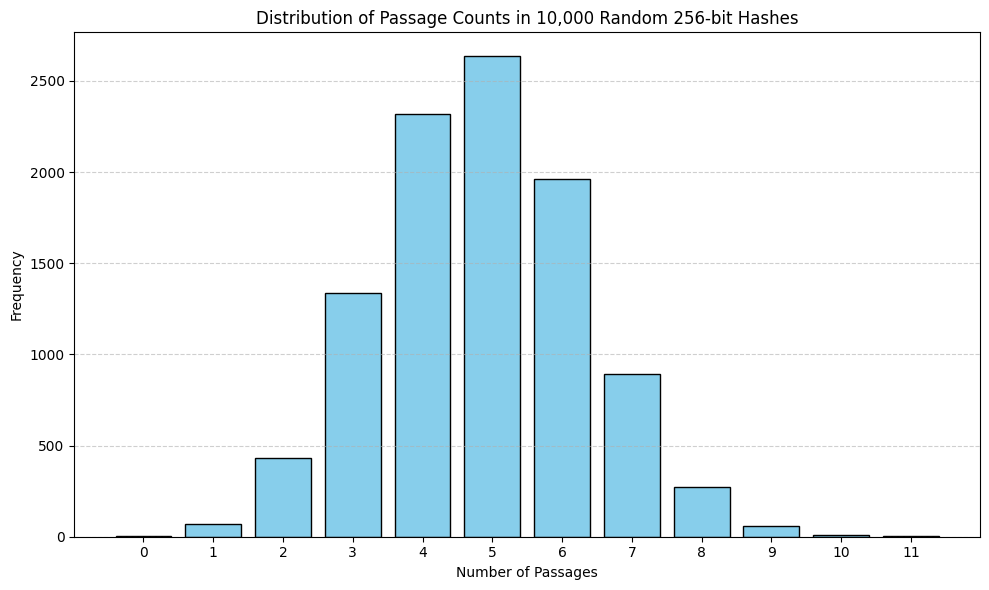

Counter({5: 2635, 4: 2317, 6: 1963, 3: 1337, 7: 894, 2: 433, 8: 272, 1: 69, 9: 61, 10: 12, 0: 5, 11: 2})


In [316]:
# Generation and aggregation
sample_size = 10000
bit_length = 256
distribution = base_hash.passage_distribution(sample_size, bits=bit_length)
counter = Counter(distribution)

# Plotting the histogram
df = pd.DataFrame.from_dict(counter, orient='index').sort_index()
df.columns = ['Frequency']
df.index.name = 'Number of Passages'

plt.figure(figsize=(10, 6))
plt.bar(df.index, df['Frequency'], color='skyblue', edgecolor='black')
plt.title(f"Distribution of Passage Counts in {sample_size:,} Random {bit_length}-bit Hashes")
plt.xlabel("Number of Passages")
plt.ylabel("Frequency")
plt.xticks(range(min(df.index), max(df.index)+1))
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
print(counter)

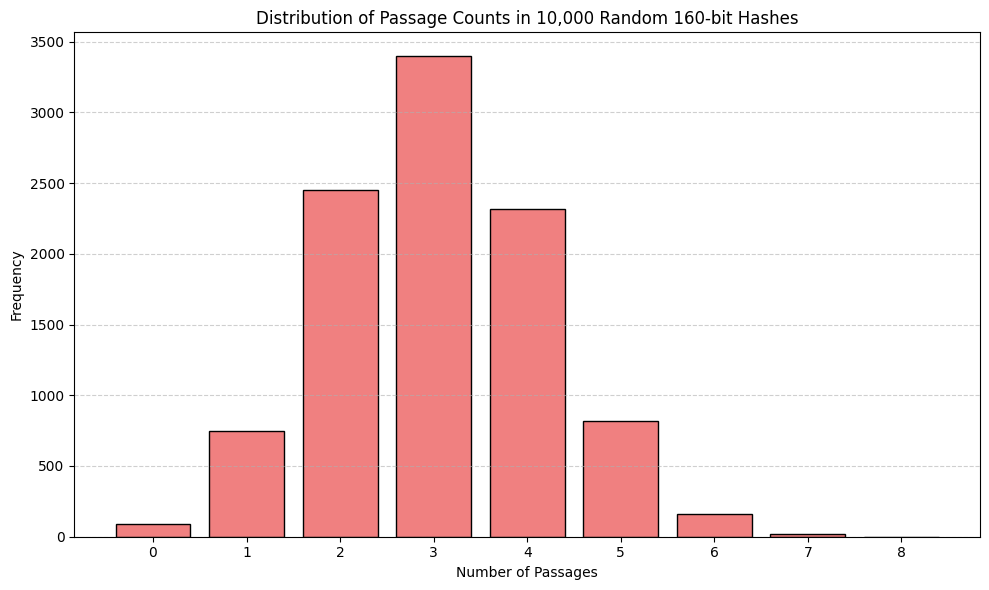

Counter({3: 3396, 2: 2448, 4: 2316, 5: 821, 1: 745, 6: 162, 0: 92, 7: 19, 8: 1})


In [313]:
# Generation and aggregation
sample_size = 10000
bit_length = 160
distribution = base_hash.passage_distribution(sample_size, bits=bit_length)
counter = Counter(distribution)

# Plotting the histogram
df = pd.DataFrame.from_dict(counter, orient='index').sort_index()
df.columns = ['Frequency']
df.index.name = 'Number of Passages'

plt.figure(figsize=(10, 6))
plt.bar(df.index, df['Frequency'], color='lightcoral', edgecolor='black')
plt.title(f"Distribution of Passage Counts in {sample_size:,} Random {bit_length}-bit Hashes")
plt.xlabel("Number of Passages")
plt.ylabel("Frequency")
plt.xticks(range(min(df.index), max(df.index)+1))
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
print(counter)

### 4.3 Simulation of Feature Distributions

In this section, we simulate a random collection of **10,000 mandalas** derived from uniformly distributed 256-bit hashes.

For each hash, we extract two structural features:

- `num_passages`: the number of radial escape paths (i.e. distinct zero-connected routes from center to edge);
- `is_balanced`: a boolean flag indicating whether the hash contains exactly 128 zeros and 128 ones — the defining condition of a **balanced mandala**.

The following table presents the raw dataset used in this simulation.  
Each row corresponds to a single hash and its computed properties, which form the basis for the aggregated analysis in the next section.

The table below summarizes the results, showing the total number of hashes for each passage count and the corresponding number of balanced mandalas.

In [327]:
df = base_hash.generate_hash_dataframe(n = 10000, bits = 256)
df

,hash,is_balanced,num_passages
0,0x7b1a6cfdf12c761a45a92ecb30dd7f36c8be84051501...,False,3
1,0x353449f284507f40f7c546a724c9ef98ed0d5d648eef...,False,4
2,0x5abadc5ea71b13a1eea83e9fc6bfa05f909e54544bac...,False,3
3,0x291a730ff6c68d74643edf22718b4289061d01bc857c...,False,4
4,0xb431bdca77a5e1559eddc7655a2eec189dceffd0e077...,False,3
...,...,...,...
9995,0xb1af84efc45406a66d63665c60395da5b225f316b16a...,False,2
9996,0x936fe3915ce86e2a494a1b8362747576fec73a30b603...,False,5
9997,0x82384f02d75bf6f76fd98ec0507d9ea1a99a13b09fcd...,False,4
9998,0x18a92a8c5007aa3f7e15326019349b98174d558ef6de...,False,6


#### 4.3.1 Aggregated Table: Passage Count vs. Bit Balance

The following table presents the results of the simulation. It summarizes:

- The number of hashes (`total_hashes`) for each value of `num_passages`;
- How many of those hashes (`balanced_count`) also satisfy the definition of a **balanced mandala**.

This aggregation allows us to estimate how frequently passage structure and bit balance co-occur in purely random data.

In [330]:
# Группировка по числу проходов с переупорядочиванием колонок
aggregation = (
    df.groupby("num_passages")
      .agg(
          total_hashes=("hash", "count"),
          balanced_count=("is_balanced", "sum")
      )
      .reset_index()[["total_hashes", "num_passages", "balanced_count"]]
)

# Печать результата
import IPython.display as disp

disp.display(aggregation)

,total_hashes,num_passages,balanced_count
0,6,0,0
1,72,1,1
2,411,2,10
3,1271,3,57
4,2471,4,131
5,2579,5,134
6,1909,6,98
7,936,7,50
8,282,8,9
9,60,9,4


#### Commentary

- The distribution of passage counts is centered around **4–6 passages**, which represent the typical structural openness of a mandala.
- **Balanced mandalas** tend to appear more frequently within this central range.
- Sealed mandalas (`num_passages = 0`) remain extremely rare — only **6 out of 10,000** hashes in our sample showed complete isolation.
- Mandalas with a **very high number of passages** (e.g. `num_passages ≥ 9`) are also statistically uncommon, as seen in the tail of the distribution.

This analysis helps quantify the structural expectations for random hash-based mandalas — and highlights how rare some configurations truly are.
